<a href="https://colab.research.google.com/github/mind-render/MIDI_Classification/blob/main/midi_to_pianoroll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mido
!pip install pypianoroll
import pypianoroll
import mido

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm #plt colour

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 48.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretty-midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=ded21982cdbef9f5e6cdc1c1b8352e0ef70bf66326e17ed205b9b64551579af9
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty-midi


In [ ]:

#Using International Society for Music Information Retrieval (ISMIR) - GiantMIDI-Piano Dataset
# https://transactions.ismir.net/articles/10.5334/tismir.80

In [ ]:
n=1
multitrack = pypianoroll.read("/content/drive/MyDrive/chopin/chopin ("+str(n)+").mid")
track=multitrack.tracks[0]
print(track)

StandardTrack(name='', program=0, is_drum=False, pianoroll=array(shape=(16512, 128), dtype=uint8))


In [ ]:
print(type(multitrack.tracks[0].pianoroll))
print()

<class 'numpy.ndarray'>



In [ ]:
#1by2 pooling test with numpy, 2 to 3 dim and max

ptest=np.array([[4,3,2,4],
                [2,5,3,6],
                [9,2,5,6],
                [5,3,2,1]])
#poolingtest=ptest.reshape(2,1,2,2).max(axis=(1,3))
poolingtest=ptest.reshape(2,2,4)
print(poolingtest)
poolingtest=poolingtest.max(axis=1)
print(poolingtest)

[[[4 3 2 4]
  [2 5 3 6]]

 [[9 2 5 6]
  [5 3 2 1]]]
[[4 5 3 6]
 [9 3 5 6]]


In [ ]:
import torch
import torch.nn as nn
nntest=np.array([[4,3,2,4],
                [2,5,3,6],
                [9,2,5,6],
                [5,3,2,1]])

tensor_img = torch.from_numpy(nntest)
print(tensor_img)
tensor_img = tensor_img.unsqueeze(dim=0)
print(tensor_img)

pooling = torch.nn.MaxPool2d((2,1))

# You need to cast your image to float as
# pooling is not implemented for Tensors of type long
new_img = pooling(tensor_img.float())

new_img = new_img.squeeze(dim=0)
print(new_img)
final_image = new_img.numpy().astype(int)
print(final_image)

tensor([[4, 3, 2, 4],
        [2, 5, 3, 6],
        [9, 2, 5, 6],
        [5, 3, 2, 1]])
tensor([[[4, 3, 2, 4],
         [2, 5, 3, 6],
         [9, 2, 5, 6],
         [5, 3, 2, 1]]])
tensor([[4., 5., 3., 6.],
        [9., 3., 5., 6.]])
[[4 5 3 6]
 [9 3 5 6]]


3840 128
6 37 0
26424 128
7 288 0
20712 128


KeyboardInterrupt: ignored

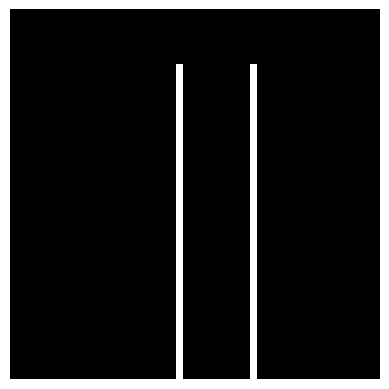

In [ ]:
for n in range(6,20): #3:1 time based max pooling 180x60->60 60 (about 4 sec in one image, )
    multitrack = pypianoroll.read("/content/drive/MyDrive/chopin/chopin ("+str(n)+").mid")
    #print(multitrack)
    trackarr=multitrack.tracks[0].pianoroll
    print(len(trackarr),len(trackarr[0]))
    imgnum=0
    notgooddata=0
    for i in range(1,(len(trackarr)-360)//90):
        temptrackarr=trackarr[10+90*i:190+90*i,30:90]
        temptrackarr=np.where(temptrackarr==0,0,1)

        #print(len(temptrackarr),len(temptrackarr[0])) arr->tensor->maxpool->arr
        temptrackarr=torch.from_numpy(temptrackarr).unsqueeze(dim=0)
        pooling=torch.nn.MaxPool2d((3,1))
        
        temptrackarr=pooling(temptrackarr.float()).squeeze(dim=0).numpy().astype(int)
        
        #print(type(temptrackarr),temptrackarr,len(temptrackarr),len(temptrackarr[0]))
        # trackarr
        # # multitrack.plot()
        # plt.plot(trackarr)  
        # plt.show()
        if(sum(sum(temptrackarr))<20):
            notgooddata=notgooddata+1
            continue
        plt.imshow(temptrackarr,cmap=cm.gray)
        #plt.show()
        plt.axis('off')
        plt.savefig(fname='/content/drive/MyDrive/chopin_pianoroll/chopin'+str(n)+'_'+str(imgnum)+'.png', bbox_inches='tight', pad_inches=0)
        imgnum=imgnum+1
    print(n,imgnum,notgooddata)
        

In [ ]:
#바흐흑 바흐흑 20

for n in range(9,20): #3:1 time based max pooling 180x60->60 60 (about 4 sec in one image, )
    multitrack = pypianoroll.read("/content/drive/MyDrive/bach/bach ("+str(n)+").mid")
    #print(multitrack)
    trackarr=multitrack.tracks[0].pianoroll
    print(len(trackarr),len(trackarr[0]))
    imgnum=0
    notgooddata=0
    for i in range(1,(len(trackarr)-360)//90):
        temptrackarr=trackarr[10+90*i:190+90*i,30:90]
        temptrackarr=np.where(temptrackarr==0,0,1)

        #print(len(temptrackarr),len(temptrackarr[0])) arr->tensor->maxpool->arr
        temptrackarr=torch.from_numpy(temptrackarr).unsqueeze(dim=0)
        pooling=torch.nn.MaxPool2d((3,1))
        
        temptrackarr=pooling(temptrackarr.float()).squeeze(dim=0).numpy().astype(int)
        
        #print(type(temptrackarr),temptrackarr,len(temptrackarr),len(temptrackarr[0]))
        # trackarr
        # # multitrack.plot()
        # plt.plot(trackarr)  
        # plt.show()
        if(sum(sum(temptrackarr))<20):
            notgooddata=notgooddata+1
            continue
        plt.imshow(temptrackarr,cmap=cm.gray)
        #plt.show()
        plt.axis('off')
        plt.savefig(fname='/content/drive/MyDrive/bach_pianoroll2/bach'+str(n)+'_'+str(imgnum)+'.png', bbox_inches='tight', pad_inches=0)
        imgnum=imgnum+1
    print(n,imgnum,notgooddata)
        

306768 128


In [ ]:
def makeproll(n):
    multitrack = pypianoroll.read("/content/drive/MyDrive/chopin/chopin ("+str(n)+").mid")
    #print(multitrack)
    trackarr=multitrack.tracks[0].pianoroll
    print(len(trackarr),len(trackarr[0]))
    imgnum=0
    notgooddata=0
    for i in range(1,(len(trackarr)-360)//90):
        temptrackarr=trackarr[10+90*i:190+90*i,30:90]
        temptrackarr=np.where(temptrackarr==0,0,1)

        #print(len(temptrackarr),len(temptrackarr[0])) arr->tensor->maxpool->arr
        temptrackarr=torch.from_numpy(temptrackarr).unsqueeze(dim=0)
        pooling=torch.nn.MaxPool2d((3,1))
        
        temptrackarr=pooling(temptrackarr.float()).squeeze(dim=0).numpy().astype(int)
        
        #print(type(temptrackarr),temptrackarr,len(temptrackarr),len(temptrackarr[0]))
        # trackarr
        # # multitrack.plot()
        # plt.plot(trackarr)  
        # plt.show()
        if(sum(sum(temptrackarr))<20):
            notgooddata=notgooddata+1
            continue
        plt.imshow(temptrackarr,cmap=cm.gray)
        #plt.show()
        plt.axis('off')
        plt.savefig(fname='/content/drive/MyDrive/chopin_pianoroll/chopin'+str(n)+'_'+str(imgnum)+'.png', bbox_inches='tight', pad_inches=0)
        imgnum=imgnum+1
        break
    print(n,imgnum,notgooddata)

In [ ]:
from timeit import timeit

In [ ]:
timeit ('multitrack = pypianoroll.read("/content/drive/MyDrive/chopin/chopin ("+str(n)+").mid")', number =1)
timeit ('trackarr=multitrack.tracks[0].pianoroll', number =1)
imgnum=0
notgooddata=0
for i in range(1,(len(trackarr)-360)//90):
    timeit ('temptrackarr=trackarr[10+90*i:190+90*i,30:90]', number =1)
    timeit ('temptrackarr=np.where(temptrackarr==0,0,1)', number =1)
    timeit ('temptrackarr=torch.from_numpy(temptrackarr).unsqueeze(dim=0)', number =1)
# multitrack = pypianoroll.read("/content/drive/MyDrive/chopin/chopin ("+str(n)+").mid")
# trackarr=multitrack.tracks[0].pianoroll
# print(len(trackarr),len(trackarr[0]))
'''
for i in range(1,(len(trackarr)-360)//90):
    temptrackarr=trackarr[10+90*i:190+90*i,30:90]
    temptrackarr=np.where(temptrackarr==0,0,1)

    #print(len(temptrackarr),len(temptrackarr[0])) arr->tensor->maxpool->arr
    temptrackarr=torch.from_numpy(temptrackarr).unsqueeze(dim=0)
    pooling=torch.nn.MaxPool2d((3,1))
       
    temptrackarr=pooling(temptrackarr.float()).squeeze(dim=0).numpy().astype(int)
        
        #print(type(temptrackarr),temptrackarr,len(temptrackarr),len(temptrackarr[0]))
        # trackarr
        # # multitrack.plot()
        # plt.plot(trackarr)  
        # plt.show()
    if(sum(sum(temptrackarr))<20):
        notgooddata=notgooddata+1
        continue
    plt.imshow(temptrackarr,cmap=cm.gray)
    #plt.show()
    plt.axis('off')
    plt.savefig(fname='/content/drive/MyDrive/chopin_pianoroll/chopin'+str(n)+'_'+str(imgnum)+'.png', bbox_inches='tight', pad_inches=0)
    imgnum=imgnum+1
    break
'''

NameError: ignored

93624 128
20 1 26


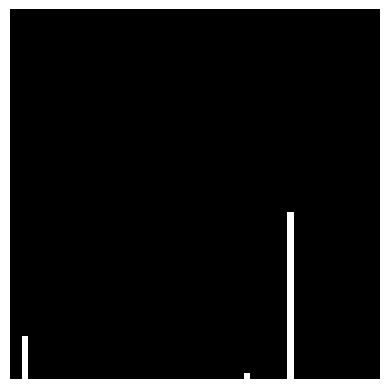

In [ ]:
from cProfile import Profile

profiler = Profile()
profiler.run('makeproll(20)')

In [ ]:
from pstats import Stats

stats = Stats(profiler)
stats.strip_dirs()
stats.sort_stats('line')
stats.print_stats()

         2894213 function calls (2893118 primitive calls) in 4.074 seconds

   Ordered by: line number

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {method 'pop' of 'collections.OrderedDict' objects}
        4    0.000    0.000    0.000    0.000 {method 'values' of 'collections.OrderedDict' objects}
        1    0.000    0.000    0.000    0.000 {method 'move_to_end' of 'collections.OrderedDict' objects}
       35    0.000    0.000    0.000    0.000 {method 'values' of 'mappingproxy' objects}
        1    0.000    0.000    0.000    0.000 {method 'indices' of 'slice' objects}
       11    0.000    0.000    0.000    0.000 {method 'add' of 'set' objects}
     1422    0.000    0.000    0.000    0.000 {function RcParams.__getitem__ at 0x7f89e04bdb40}
     1525    0.000    0.000    0.000    0.000 {method 'get' of 'dict' objects}
       34    0.000    0.000    0.000    0.000 {method 'setdefault' of 'dict' objects}
      

In [ ]:
for n in range(1,20): #3:1 time based max pooling 180x60->60 60 (about 4 sec in one image, )
    multitrack = pypianoroll.read("/content/drive/MyDrive/bach/bach ("+str(n)+").mid")
    #print(multitrack)
    #보틀넥 
    trackarr=multitrack.tracks[0].pianoroll
    print(len(trackarr),len(trackarr[0]))
    imgnum=0
    notgooddata=0
    for i in range(1,(len(trackarr)-360)//90):
        temptrackarr=trackarr[10+90*i:190+90*i,30:90]
        temptrackarr=np.where(temptrackarr==0,0,1)

        #print(len(temptrackarr),len(temptrackarr[0])) arr->tensor->maxpool->arr
        temptrackarr=torch.from_numpy(temptrackarr).unsqueeze(dim=0)
        pooling=torch.nn.MaxPool2d((3,1))
        
        temptrackarr=pooling(temptrackarr.float()).squeeze(dim=0).numpy().astype(int)
        
        #print(type(temptrackarr),temptrackarr,len(temptrackarr),len(temptrackarr[0]))
        # trackarr
        # # multitrack.plot()
        # plt.plot(trackarr)  
        # plt.show()
        if(sum(sum(temptrackarr))<20):
            notgooddata=notgooddata+1
            continue
        plt.imshow(temptrackarr,cmap=cm.gray)
        #plt.show()
        plt.axis('off')
        plt.savefig(fname='/content/drive/MyDrive/bach_pianoroll/bach'+str(n)+'_'+str(imgnum)+'.png', bbox_inches='tight', pad_inches=0)
        imgnum=imgnum+1
    print(n,imgnum,notgooddata)
        

16512 128


KeyboardInterrupt: ignored

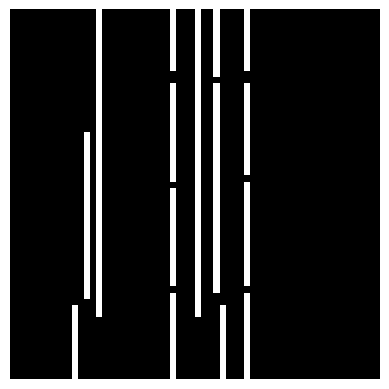

In [ ]:
for n in range(1,4): #no pooling 60x60
    multitrack = pypianoroll.read("/content/drive/MyDrive/chopin/chopin ("+str(n)+").mid")
    #print(multitrack)
    trackarr=multitrack.tracks[0].pianoroll
    print(len(trackarr),len(trackarr[0]))
    for i in range(1,(len(trackarr)-40)//30):
        temptrackarr=trackarr[10+30*i:70+30*i,30:90]
        # trackarr
        # # multitrack.plot()
        # plt.plot(trackarr)  
        # plt.show()
        temptrackarr=np.where(temptrackarr==0,0,1)
        plt.imshow(temptrackarr,cmap=cm.gray)
        #plt.show()
        plt.axis('off')
        plt.savefig(fname='/content/drive/MyDrive/chopin/chopin'+str(n)+'_'+str(i)+'.png', bbox_inches='tight', pad_inches=0)

7944 128


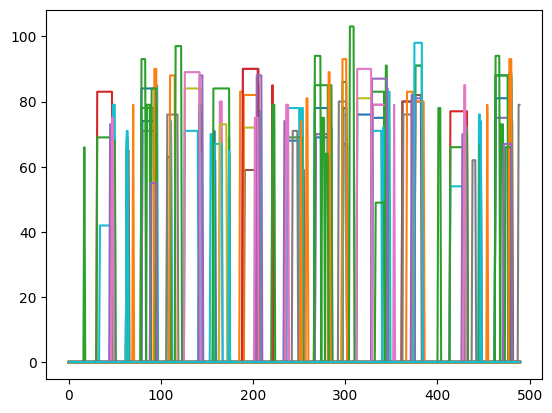

In [ ]:
#single use

# multitrack = pypianoroll.read("/content/test.mid")
# #print(multitrack)
# trackarr=multitrack.tracks[0].pianoroll
# print(len(trackarr),len(trackarr[0]))
# trackarr=trackarr[10:500,30:90]
# trackarr
# # multitrack.plot()
# plt.plot(trackarr)  
# plt.show()

In [ ]:
print(trackarr)
trackarr=np.array(trackarr)
print(trackarr)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


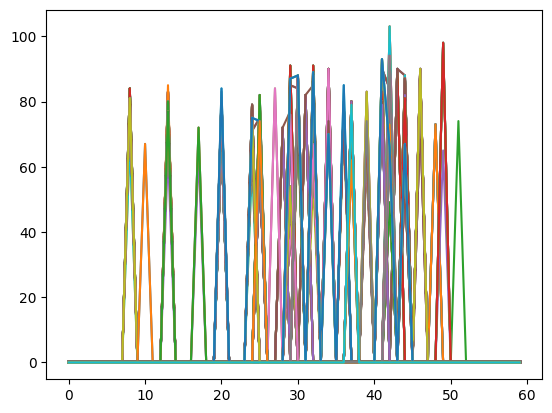

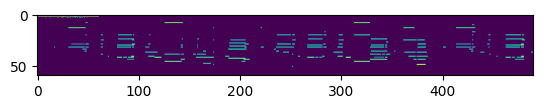

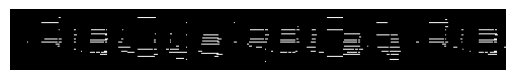

In [ ]:
# np.flip(trackarr)
#trackarr=np.transpose(trackarr)

# trackarr=np.swapaxes(trackarr,0,1)
plt.plot(trackarr)  
plt.show()
plt.imshow(trackarr)
#plt.show()

plt.savefig('1.png',pad_inches=0)

trackarr01=np.where(trackarr==0,0,1)

plt.plot(trackarr01)  
plt.show()
plt.imshow(trackarr01,cmap=cm.gray)
#plt.show()
plt.axis('off')
nn=1
plt.savefig(fname=str(nn)+'2.png', bbox_inches='tight', pad_inches=0)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
mid = mido.MidiFile('/content/TEST MIDIFILE.mid', clip=True)
# print(mid.tracks[1][0])
# test=mid.tracks[1][0]
# test=str(test)
# testarr=test.split()
# print(testarr[0])
#print(mid.tracks[1])
msgarr=[]
for msg in mid.tracks[1]:
    
    msgarr.append(str(msg).split())
    print(msgarr[-1])
# from mido.messages.strings import msg2str
def timecatcher(msg):
    for temp in msg:
        try:
            a,b=temp.split('=')
            if a == 'time':
                return int(b)
        except:
            continue
    return 0

def totaltime(msg):
    time=0
    for temp in msg:
        time=time+timecatcher(temp)
    return time

time=totaltime(msgarr)
print(time)
midiarr=[128][time]
